In [2]:
import pandas as pd
import numpy as np
import re
import sklearn
# import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train=pd.read_csv("churn_prediction.csv")

In [4]:
train.head(3)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0


In [5]:
train.shape

(28382, 21)

In [6]:
train.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [7]:
train.describe(include="all")

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [8]:
train.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [9]:
temp=pd.DataFrame(index=train.columns)

In [10]:
temp['data_type']=train.dtypes
temp['null_count']=train.isnull().sum()
temp['nunique']=train.nunique()

In [11]:
temp


,data_type,null_count,nunique
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


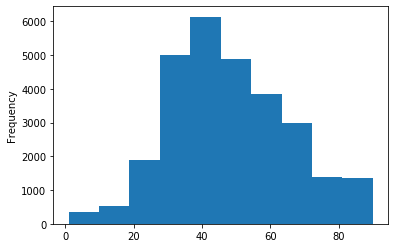

In [12]:
train['age'].plot.hist()
# train['vintage'].plot.hist()
# # train['age'].plot.hist()
# # train['age'].plot.hist()
# # train['age'].plot.hist()
# # train['age'].plot.hist()
# # train['age'].plot.hist()

In [13]:
age_avg = train['age'].mean()
age_std = train['age'].std()
age_null_count = train['age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train['age'][np.isnan(train['age'])] = age_null_random_list
train['age'] = train['age'].astype(int)

In [14]:
train['age'].mean()

48.208336269466564

In [15]:
train['age'].isnull().sum()

0

In [16]:
train['gender'].value_counts()


Male      16548
Female    11309
Name: gender, dtype: int64

In [17]:
train['gender']=train['gender'].fillna('Male')

In [18]:
train['gender'].isnull().sum()

0

In [19]:
train['gender'] = train['gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [20]:
train['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [21]:
age_avg = train['dependents'].mean()
age_std = train['dependents'].std()
age_null_count = train['dependents'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train['dependents'][np.isnan(train['dependents'])] = age_null_random_list
train['dependents'] = train['dependents'].astype(int)

In [22]:
train['dependents'].isnull().sum()

0

In [23]:
train['dependents'].value_counts()

0     23898
2      2150
1      1395
3       701
4       179
5        41
6         8
7         3
25        1
9         1
8         1
52        1
36        1
50        1
32        1
Name: dependents, dtype: int64

In [24]:
train['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [25]:
age_avg = train['city'].mean()
age_std = train['city'].std()
age_null_count = train['city'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train['city'][np.isnan(train['city'])] = age_null_random_list
train['city'] = train['city'].astype(int)

In [26]:
train['city'].isnull().sum()

0

In [27]:
train['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

In [28]:
train['days_since_last_transaction'].value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

In [29]:
age_avg = train['days_since_last_transaction'].mean()
age_std = train['days_since_last_transaction'].std()
age_null_count = train['days_since_last_transaction'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train['days_since_last_transaction'][np.isnan(train['days_since_last_transaction'])] = age_null_random_list
train['days_since_last_transaction'] = train['days_since_last_transaction'].astype(int)

In [30]:
train['days_since_last_transaction'].isnull().sum()

0

In [31]:
train['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [32]:
train['occupation']=train['occupation'].fillna('self_employed')
train['occupation'] = train['occupation'].map( {'self_employed': 0, 'salaried': 1, 'student' : 2, 'retired' : 3, 'company' : 4} ).astype(int)

In [33]:
temp['data_type']=train.dtypes
temp['null_count']=train.isnull().sum()
temp['nunique']=train.nunique()

In [34]:
temp

,data_type,null_count,nunique
customer_id,int64,0,28382
vintage,int64,0,5473
age,int32,0,90
gender,int32,0,2
dependents,int32,0,15
occupation,int32,0,5
city,int32,0,1618
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,int32,0,377


In [35]:
from sklearn.model_selection import train_test_split

In [39]:
#seperating independent and dependent variables
y = train['churn']
X = train.drop(['churn'], axis=1)

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,30,2):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [45]:
frame = pd.DataFrame({'max_depth':range(1,30,2), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.845438,0.847943
1,3,0.851405,0.852029
2,5,0.862680,0.858794
3,7,0.875975,0.854989
4,9,0.897022,0.850197


No handles with labels found to put in legend.


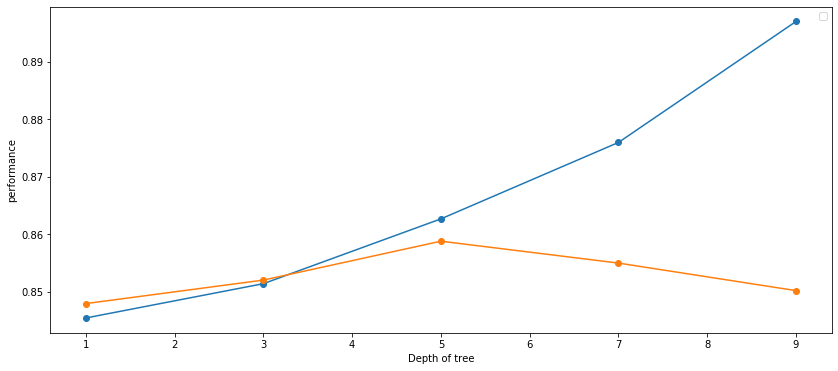

In [49]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_depth'].head(5), frame['train_acc'].head(5), marker='o')
plt.plot(frame['max_depth'].head(5), frame['valid_acc'].head(5), marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [51]:
train_accuracy = []
validation_accuracy = []
for depth in range(2,60,5):
    dt_model = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [52]:
frame = pd.DataFrame({'max_leaf_nodes':range(2,60,5), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_leaf_nodes,train_acc,valid_acc
0,2,0.845438,0.847943
1,7,0.851405,0.852029
2,12,0.857089,0.856257
3,17,0.860754,0.859076
4,22,0.861740,0.859357


No handles with labels found to put in legend.


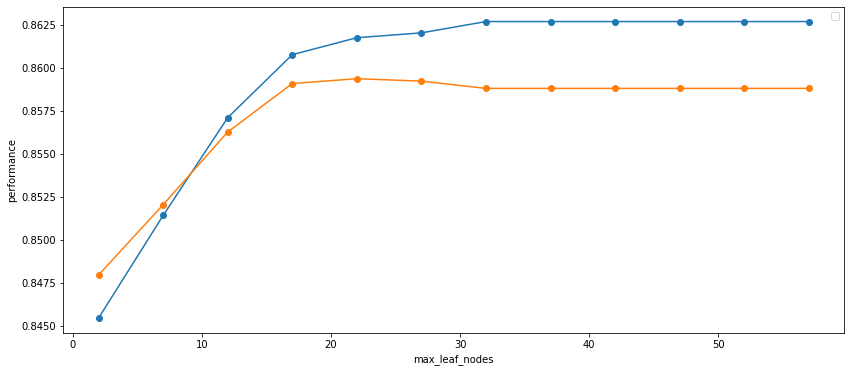

In [57]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_leaf_nodes'], frame['train_acc'], marker='o')
plt.plot(frame['max_leaf_nodes'], frame['valid_acc'], marker='o')
plt.xlabel('max_leaf_nodes')
plt.ylabel('performance')
plt.legend()

In [58]:
dt_model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=22, random_state=10)

In [59]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=22,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [60]:
dt_model.score(X_train, y_train)

0.861740110870995

In [61]:
dt_model.score(X_valid, y_valid)

0.8593573844419391

In [62]:
from sklearn import tree

In [63]:
!pip install graphviz

In [64]:
dt_model1 = LogisticRegression()
dt_model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
dt_model1.score(X_train, y_train)

0.8260358921356761

In [66]:
dt_model1.score(X_valid, y_valid)

0.8255355129650507

In [67]:
dt_model2 = Perceptron()
dt_model2.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
dt_model2.score(X_train, y_train)

0.7153997932913653

In [69]:
dt_model2.score(X_valid, y_valid)

0.7067361894024803

### BEST ANSWER GET BY DECISION TREE WITH AN ACCURACY OF NEARLY 86%